# Classify audio effects on guitar samples

## 0. Import and config

In [1]:
import os
import time
import numpy as np
import pandas as pd
import scipy
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import sklearn

In [13]:
# Setup variables
samplerate = 44100
sample_len = 2*samplerate
n_mfcc = 13
hop_len = 512
segment_len = int(np.ceil(sample_len/hop_len))
mfcc_len = segment_len
spectral_bandwidth_len = segment_len
spectral_flatness_len = 1
feature_len = mfcc_len*n_mfcc + spectral_bandwidth_len + spectral_flatness_len
feature_reduced_len = mfcc_len*2 + spectral_bandwidth_len + spectral_flatness_len
print("Full feature size: %i" % feature_len)
print("Reduced feature size: %i" % feature_reduced_len)

Full feature size: 2423
Reduced feature size: 520


## 1. Import and prepare data

In [21]:
#get audio files
fileswchorus = os.listdir('./DataSet/Samples/Chorus')
fileswdistortion = os.listdir('./DataSet/Samples/Distortion')
filesweq = os.listdir('./DataSet/Samples/EQ')
fileswdelay = os.listdir('./DataSet/Samples/FeedbackDelay')
fileswflanger = os.listdir('./DataSet/Samples/Flanger')
fileswnofx = os.listdir('./DataSet/Samples/NoFX')

#calc number of samples
n_data = len(fileswchorus)+len(fileswdistortion)+len(filesweq)+len(fileswdelay)+len(fileswflanger)+len(fileswnofx)
print("Number of samples: %i" % n_data)

#setup classes
labels = np.zeros(n_data)
features_full = np.zeros((n_data, feature_len))
features_reduced = np.zeros((n_data, feature_reduced_len))
classes = ['Chorus','Distortion','EQ','FeedbackDelay','Flanger','NoFX']

Number of samples: 9360


## 2.a Extract features

### Extract full MFCCs, spectral bandwidth, and spectral flatness

In [35]:
from IPython.display import clear_output
start_time = time.time()
count = 0

def extract_features(filename, count=0):
    signal, dummy = librosa.load(filename, samplerate, mono=True)
    mfccs = librosa.feature.mfcc(signal, samplerate, n_mfcc=n_mfcc, hop_length=hop_len).flatten()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(signal, samplerate).flatten()
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(signal).flatten())
    output = np.append(np.concatenate((mfccs, spectral_bandwidth)),spectral_flatness)
    clear_output(wait=True)
    print("%i/%i samples processed" % (count, n_data))
    return output
    
idx = 0
    
for x in fileswchorus:
    count = count+1
    output = extract_features('./DataSet/Samples/Chorus/' + x, count)
    features_full[idx,:] = output
    labels[idx] = 0
    idx = idx+1
    
for x in fileswdistortion:
    count = count+1
    output = extract_features('./DataSet/Samples/Distortion/' + x, count)
    features_full[idx,:] = output
    labels[idx] = 1
    idx = idx+1    
        
for x in filesweq:
    count = count+1
    output = extract_features('./DataSet/Samples/EQ/' + x, count)
    features_full[idx,:] = output
    labels[idx] = 2
    idx = idx+1    
    
for x in fileswdelay:
    count = count+1
    output = extract_features('./DataSet/Samples/FeedbackDelay/' + x, count)
    features_full[idx,:] = output
    labels[idx] = 3
    idx = idx+1    

for x in fileswflanger:
    count = count+1
    output = extract_features('./DataSet/Samples/Flanger/' + x, count)
    features_full[idx,:] = output
    labels[idx] = 4
    idx = idx+1    

for x in fileswnofx:
    count = count+1
    output = extract_features('./DataSet/Samples/NoFX/' + x, count)
    features_full[idx,:] = output
    labels[idx] = 5
    idx = idx+1    

print("Feature extraction done")
print("Took %d seconds" % (time.time() - start_time))

9360/9360 samples processed
Feature extraction done
Took 540 seconds


### Extract MFCC mean and variance, spectral bandwidth, and spectral flatness

In [36]:
from IPython.display import clear_output
start_time = time.time()
count = 0

def extract_features(filename, count=0):
    signal, dummy = librosa.load(filename, samplerate, mono=True)
    mfccs = librosa.feature.mfcc(signal, samplerate, n_mfcc=n_mfcc, hop_length=hop_len)
    mfccs_mean = np.mean(mfccs,0).flatten()
    mfccs_std = np.std(mfccs,0).flatten()
    spec_band = librosa.feature.spectral_bandwidth(signal, samplerate).flatten()
    spec_flatness = np.mean(librosa.feature.spectral_flatness(signal).flatten())
    output = np.append(np.concatenate((mfccs_mean, mfccs_std, spec_band)),spec_flatness)
    clear_output(wait=True)
    print("%i/%i samples processed" % (count, n_data))
    return output
    
idx = 0
    
for x in fileswchorus:
    count = count+1
    output = extract_features('./DataSet/Samples/Chorus/' + x, count)
    features_reduced[idx,:] = output
    labels[idx] = 0
    idx = idx+1
    
for x in fileswdistortion:
    count = count+1
    output = extract_features('./DataSet/Samples/Distortion/' + x, count)
    features_reduced[idx,:] = output
    labels[idx] = 1
    idx = idx+1    
        
for x in filesweq:
    count = count+1
    output = extract_features('./DataSet/Samples/EQ/' + x, count)
    features_reduced[idx,:] = output
    labels[idx] = 2
    idx = idx+1    
    
for x in fileswdelay:
    count = count+1
    output = extract_features('./DataSet/Samples/FeedbackDelay/' + x, count)
    features_reduced[idx,:] = output
    labels[idx] = 3
    idx = idx+1    

for x in fileswflanger:
    count = count+1
    output = extract_features('./DataSet/Samples/Flanger/' + x, count)
    features_reduced[idx,:] = output
    labels[idx] = 4
    idx = idx+1    

for x in fileswnofx:
    count = count+1
    output = extract_features('./DataSet/Samples/NoFX/' + x, count)
    features_reduced[idx,:] = output
    labels[idx] = 5
    idx = idx+1    

print("Feature extraction done")
print("Took %d seconds" % (time.time() - start_time))

9360/9360 samples processed
Feature extraction done
Took 550 seconds


In [37]:
labels = pd.DataFrame(labels)
labels.columns = ['labels']
labels = labels['labels']

### Save features to .csv

In [6]:
dataset = pd.DataFrame(features)
column_names = []
for c in range(feature_len):
    column_names.append("Feat %i" % c)
dataset.columns =  column_names
dataset['label digit'] = labels
label_text = []
for l in labels:
    label_text.append(classes[int(l)])
dataset['label text'] = label_text
dataset.to_csv('features.csv')
dataset

,Feat 0,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 1123,Feat 1124,Feat 1125,Feat 1126,Feat 1127,Feat 1128,Feat 1129,Feat 1130,label digit,label text
0,-784.702332,-784.702332,-784.702332,-783.191589,-780.561096,-780.741699,-779.379578,-780.059937,-780.545044,-779.264648,...,-9.980167,-9.575130,-11.077902,-10.313608,-9.547455,-8.738466,-9.587674,-6.503111,0.0,Chorus
1,-761.046631,-761.046631,-761.046631,-760.790771,-758.623718,-758.156921,-756.930786,-757.317566,-757.418396,-756.323364,...,-11.614445,-10.615732,-10.760288,-10.884594,-8.935947,-10.373097,-10.659937,-7.882442,0.0,Chorus
2,-755.930176,-755.930176,-755.930176,-755.882141,-755.104919,-753.960022,-752.564697,-752.798523,-752.437561,-752.191284,...,-9.644500,-5.715909,-3.048868,-2.390507,-0.943978,-2.096195,-3.543271,-2.525408,0.0,Chorus
3,-775.834900,-775.834900,-775.834900,-775.834900,-775.834900,-771.108582,-766.405090,-763.087646,-762.393433,-763.058472,...,-5.656474,-5.338774,-5.956665,-6.357945,-5.982137,-5.842979,-4.504141,-2.002567,0.0,Chorus
4,-745.423096,-745.423096,-745.423096,-745.423096,-745.423096,-743.130554,-740.174133,-737.529724,-736.178650,-735.844055,...,-6.135539,-7.253041,-7.990482,-7.548039,-7.059709,-6.347627,-4.458066,-1.742748,0.0,Chorus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,...,17.676605,18.026758,18.565594,17.836399,16.837769,15.430470,12.818876,10.243580,5.0,NoFX
9356,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,...,26.542507,25.427277,23.974236,21.803810,19.794647,17.421839,14.595476,12.041007,5.0,NoFX
9357,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,...,25.770664,24.639793,23.246094,21.348425,19.865543,17.576389,14.275450,10.246469,5.0,NoFX
9358,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,...,20.394966,18.981857,18.081066,16.769773,15.511858,13.729324,10.692130,7.975833,5.0,NoFX


In [38]:
# Feature switch
features = features_reduced
#features = features_full
print(features.shape)

(9360, 520)


In [39]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.2, random_state=7)

In [40]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

## Dimensionality reduction

(9360, 5)


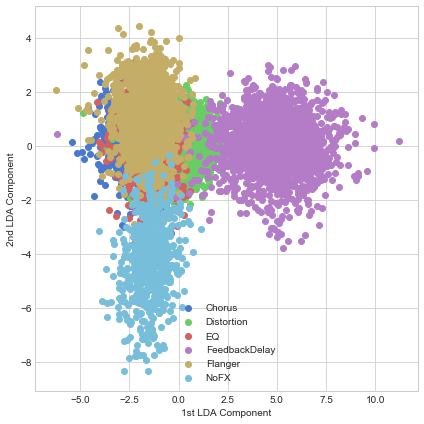

In [10]:
#Creating an instance of the LDA object, which is an object capable of learning and applying LDA from/to data.
#if we want to keep only a given number of components we can use the argument "n_components"
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


#LDA needs BOTH features and labels (as numbers), other techniques needs only features
lda.fit(features, labels)

#Now we project the data into a from a 7D to a (number of classes - 1) space,
#if the number of components in scikit-learn, LDA transform the data to a number of dimensions
#equal to min(n_classes - 1), which in our case is 4 classes -1 = 3.
#with more classess we will have more dimensions at the output of LDA projection
projected_features = lda.transform(features)

#the dimensionality should be the same number of classes - 1
print(projected_features.shape)

#Plot the distribution of the data according to the first two LDA components
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 6))
    for lab_val, lab_name in zip(range(0,len(classes)),classes):
        plt.scatter(projected_features[labels==lab_val, 1],
                    projected_features[labels==lab_val, 2],
                    label=lab_name)
    plt.xlabel('1st LDA Component')
    plt.ylabel('2nd LDA Component')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
proj_feat_train, proj_feat_test, lab_train, lab_test = train_test_split(projected_features, labels, test_size=0.2, random_state=7)

## SVM Classifier 

In [12]:
#Creating an instance of a SVM classifier
model_SVM = sklearn.svm.SVC(kernel='rbf', C=2.0, verbose=True)

#training the model
model_SVM.fit(proj_feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = model_SVM.predict(proj_feat_test)

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

[LibSVM]Number of mislabeled samples 242 out of 1872
Accuracy: 0.8707264957264957


              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       377
         1.0       1.00      1.00      1.00       391
         2.0       0.78      0.82      0.80       242
         3.0       1.00      0.99      0.99       363
         4.0       0.77      0.72      0.75       378
         5.0       0.91      0.95      0.93       121

    accuracy                           0.87      1872
   macro avg       0.87      0.88      0.87      1872
weighted avg       0.87      0.87      0.87      1872



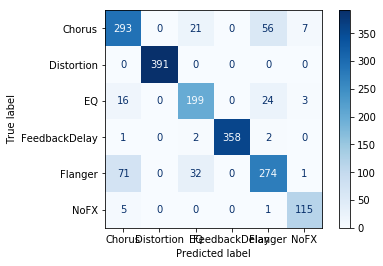

In [13]:
#computing a comprehensive set of performance metrics
print(sklearn.metrics.classification_report(lab_test, lab_predict))

disp = sklearn.metrics.plot_confusion_matrix(model_SVM, proj_feat_test, lab_test, display_labels=classes, cmap=plt.cm.Blues, normalize=None)

## ANN Classifier

### No dimensionality reduction 

Iteration 1, loss = 0.91098337
Iteration 2, loss = 0.47468200
Iteration 3, loss = 0.36448007
Iteration 4, loss = 0.32322421
Iteration 5, loss = 0.28866691
Iteration 6, loss = 0.27124579
Iteration 7, loss = 0.24738704
Iteration 8, loss = 0.22819835
Iteration 9, loss = 0.22485364
Iteration 10, loss = 0.20974597
Iteration 11, loss = 0.20908665
Iteration 12, loss = 0.19696207
Iteration 13, loss = 0.19029983
Iteration 14, loss = 0.18266926
Iteration 15, loss = 0.17628374
Iteration 16, loss = 0.16042684
Iteration 17, loss = 0.17136462
Iteration 18, loss = 0.15312437
Iteration 19, loss = 0.16218778
Iteration 20, loss = 0.14430918
Iteration 21, loss = 0.13800098
Iteration 22, loss = 0.13161973
Iteration 23, loss = 0.12486922
Iteration 24, loss = 0.12121970
Iteration 25, loss = 0.12271326
Iteration 26, loss = 0.11376125
Iteration 27, loss = 0.10367320
Iteration 28, loss = 0.11237824
Iteration 29, loss = 0.11367106
Iteration 30, loss = 0.11303118
Iteration 31, loss = 0.10671592
Iteration 32, los

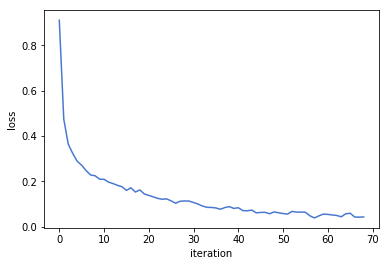

Number of mislabeled samples 141 out of 1872
Accuracy: 0.9246794871794872
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       377
         1.0       1.00      1.00      1.00       391
         2.0       0.95      0.95      0.95       242
         3.0       1.00      0.99      1.00       363
         4.0       0.89      0.76      0.82       378
         5.0       0.94      0.99      0.96       121

    accuracy                           0.92      1872
   macro avg       0.93      0.93      0.93      1872
weighted avg       0.93      0.92      0.92      1872



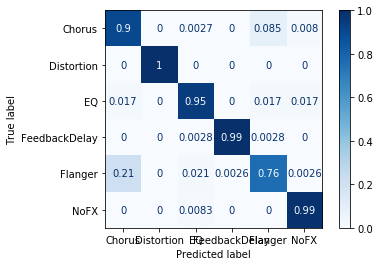

In [41]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(100,50,100), max_iter=10000, activation='relu', verbose=True)

#train the model
mlp.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = mlp.predict(feat_test)
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
disp = sklearn.metrics.plot_confusion_matrix(mlp, feat_test, lab_test, display_labels=classes, cmap=plt.cm.Blues, normalize="true")

### With dimensionality reduction

Accuracy: 0.8563034188034188


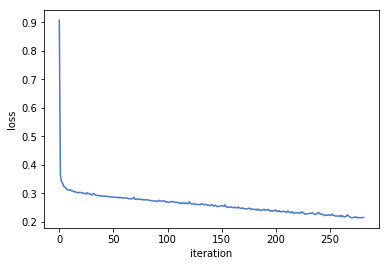

Number of mislabeled samples 269 out of 1872
Accuracy: 0.8563034188034188
              precision    recall  f1-score   support

         0.0       0.70      0.82      0.76       377
         1.0       1.00      1.00      1.00       391
         2.0       0.79      0.77      0.78       242
         3.0       0.99      0.99      0.99       363
         4.0       0.76      0.64      0.70       378
         5.0       0.91      0.93      0.92       121

    accuracy                           0.86      1872
   macro avg       0.86      0.86      0.86      1872
weighted avg       0.86      0.86      0.86      1872



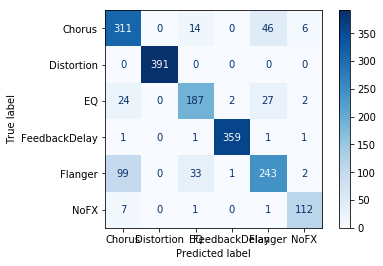

In [14]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(100,50,100), max_iter=10000, activation='relu', verbose=False)

#train the model
mlp.fit(proj_feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = mlp.predict(proj_feat_test)
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
disp = sklearn.metrics.plot_confusion_matrix(mlp, proj_feat_test, lab_test, display_labels=classes, cmap=plt.cm.Blues, normalize=None)

In [17]:
#displaying names of misclassified files
results = lab_test == lab_predict

for index, value in results.items():
    if value == False:
        print(classes[int(lab_test[index])])

AttributeError: 'numpy.ndarray' object has no attribute 'items'

# K-Fold Cross Validation

In [91]:
# Creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=1200)),
                                  ('classifier', MLPClassifier(hidden_layer_sizes=(100,50,100), max_iter=10000, activation='relu', verbose=False))
                                 ])

In [92]:
skf = sklearn.model_selection.StratifiedKFold()
scores = sklearn.model_selection.cross_validate(pipe, features, labels, cv=skf, scoring=('f1_macro', 'accuracy'), return_train_score=True)

print(scores,'\n')
print('Accuracy mean and variance', np.mean(scores['test_accuracy']),np.var(scores['test_accuracy']),'\n')
print('F1 macro mean and variance', np.mean(scores['test_f1_macro']),np.var(scores['test_f1_macro']),'\n')

{'fit_time': array([14.15738344, 14.35128856, 11.12805057, 14.81203175, 13.95379949]), 'score_time': array([0.12596726, 0.09196949, 0.10300446, 0.10396767, 0.09199834]), 'test_f1_macro': array([0.88546092, 0.91314764, 0.92597371, 0.87839753, 0.89711605]), 'train_f1_macro': array([1.      , 1.      , 0.999722, 1.      , 1.      ]), 'test_accuracy': array([0.88568376, 0.91720085, 0.92521368, 0.88942308, 0.90544872]), 'train_accuracy': array([1.        , 1.        , 0.99973291, 1.        , 1.        ])} 

Accuracy mean and variance 0.904594017094017 0.00023451767842793563 

F1 macro mean and variance 0.9000191696748564 0.0003067721797274327 



## Repeated K-Fold Cross Validation

In [85]:
# Creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                                  ('classifier', MLPClassifier(hidden_layer_sizes=(100,50,100), max_iter=10000, activation='relu', verbose=False))
                                 ])

In [86]:
rskf = sklearn.model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
scores = sklearn.model_selection.cross_validate(pipe, features, labels, cv=rskf, scoring=('f1_macro', 'accuracy'), return_train_score=True)

print(scores,'\n')
print('Accuracy mean and variance', np.mean(scores['test_accuracy']),np.var(scores['test_accuracy']),'\n')
print('F1 macro mean and variance', np.mean(scores['test_f1_macro']),np.var(scores['test_f1_macro']),'\n')

{'fit_time': array([10.2239933 , 14.08999968, 18.41248107, 13.02206707, 14.89700079,
       18.61003208, 16.40209007, 14.15699863, 20.04899693, 14.2590003 ,
       11.93099833, 17.296     , 12.86810017,  9.89000034, 15.53950214,
       10.20367599, 11.83549905, 11.54903078, 12.59503102, 12.8132503 ,
       12.79365325, 14.77900028, 11.21000004,  8.12499857, 13.50999856,
       15.50911188, 17.26399827, 19.16099811, 15.4886241 , 13.0180614 ,
       13.28530955,  9.36357808, 12.60299873, 13.77499938, 13.28499818,
       11.77075219, 22.1409986 , 18.41699839, 10.34899998, 17.5355103 ,
       16.04726267, 10.69400001, 13.05899978, 17.73396873, 12.88899112,
       12.36600065, 14.10109091, 10.56403065, 10.62603259, 13.43567681]), 'score_time': array([0.02899981, 0.03199959, 0.02699757, 0.02803111, 0.02603173,
       0.02699995, 0.0359993 , 0.03400135, 0.03400111, 0.02600002,
       0.02600169, 0.0279994 , 0.02800179, 0.0269959 , 0.02699852,
       0.03000021, 0.02699518, 0.02900052, 0.02600

## Grid search

### SVM parameter search

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lda', LinearDiscriminantAnalysis()),
                 ('classifier', SVC())])

rskf = sklearn.model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
grid_params = {
    'classifier__C':[10,20,30]
}

grid_search = sklearn.model_selection.GridSearchCV(estimator=pipe, param_grid=grid_params, scoring='accuracy', cv=rskf, n_jobs=-1)
grid_search.fit(features,labels)

print('best set of parameters', grid_search.best_params_)
print('associated best score',grid_search.best_score_)      

### MLP parameter search

In [ ]:
# Creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pipe = Pipeline([('scaler', StandardScaler()),
                 #('lda', LinearDiscriminantAnalysis()),
                 ('classifier', MLPClassifier(hidden_layer_sizes=(10,5,10), max_iter=10000, activation='relu'))
                ])

rskf = sklearn.model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
grid_params = {
    'classifier__hidden_layer_sizes':[(10,5,10),(100,50,100),(1000,500,1000)]
}
                                                       
grid_search = sklearn.model_selection.GridSearchCV(estimator=pipe, param_grid=grid_params, scoring='accuracy',cv=rskf,n_jobs=-1)
grid_search.fit(features, labels)
                                                       
print('best set of parameters', grid_search.best_params_)
print('associated best score',grid_search.best_score_)                                                       
                                                       